# Ejercicio 5

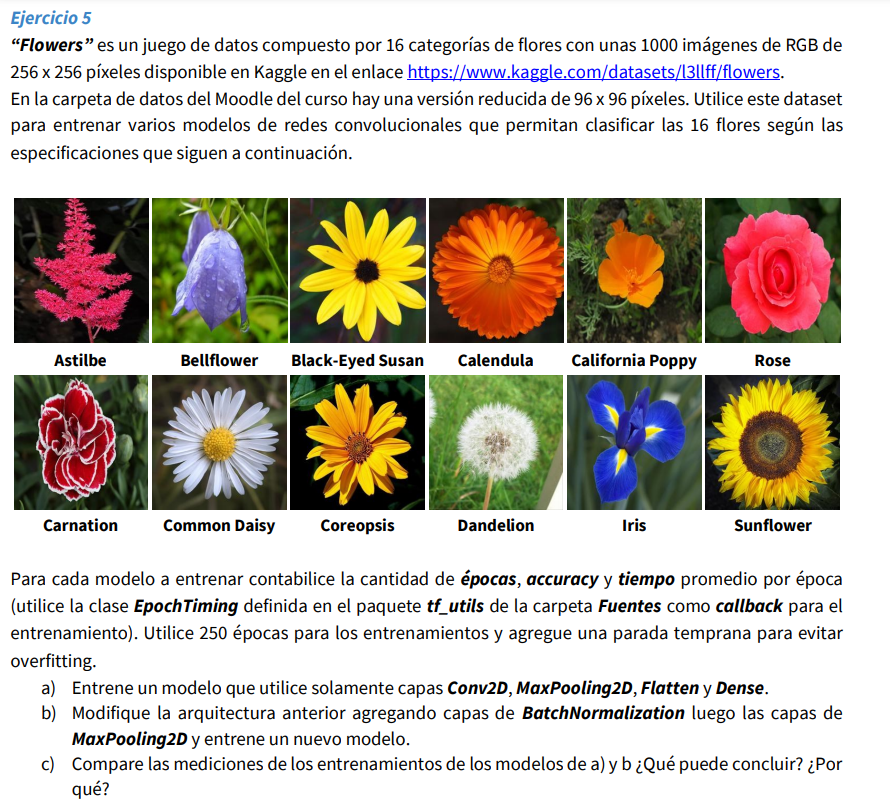

### Importe de librerias y lectura de datos

In [3]:
# configuración para notebook con instalación LOCAL
FUENTES_DIR = '../Fuentes'         # carpeta donde se encuentran archivos .py auxiliares
DATOS_DIR   = '../Datos/' # carpeta donde se encuentran los datasets

# agrega ruta de busqueda donde tenemos archivos .py
import sys
sys.path.append(FUENTES_DIR)

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from skimage import io
from skimage.transform import rotate
import numpy as np
import glob
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from ClassEpochTiming import EpochTiming


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Preparacion de datos

In [11]:

# constantes para arquitectura, generación datos y entrenamiento/validacion
IMG_SIZE = (96, 96, 3)  # tamaño de la imagen de entrada
N_CLASSES = 16          # cantidad de clases a identificar
LOTES = 128             # tamaño de lotes para entrenamiento y testeo 
ALFA = 0.01             # tasa de entrenamiento
EPOCAS = 250          # cantidad de epocas a entrenar como máximo
PACIENCIA = 10          # parámetro para parada temprana
SEP_TRAIN_TEST = 0.2    # división en entrenamiento y validación 


IMAGES_DIR = 'C:\\Users\\VICTUS\\Documents\\2024\\Deep_Learning_UNLP\\Datos\\flowers'

# construye un generador de imagenes para dividir en entrenamiento y validación
data_generator = ImageDataGenerator(
    validation_split=SEP_TRAIN_TEST,
    rescale= 1.0/255,
    zoom_range=0.15,  # (0.8,1.0),         # zoom
    width_shift_range=0.2,   # desplazamiento horizontal
    height_shift_range=0.2,  # desplazamiento vertical
    horizontal_flip=True,   # espejo horizontal
    brightness_range=(0.8, 1.2) # brillo
)


In [12]:

# generador para entrenamiento a partir de la carpeta indicada en IMAGES_DIR
train_iter = data_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=IMAGES_DIR, 
            class_mode='categorical',
            batch_size=LOTES,
            subset='training'   # asigna subconjunto segun validation_split del ImageDataGenerator
            )

valid_iter = data_generator.flow_from_directory(
            target_size=(IMG_SIZE[0],IMG_SIZE[1]),
            directory=IMAGES_DIR, 
            class_mode='categorical',
            batch_size=LOTES,
            subset='validation' # asigna subconjunto segun validation_split del ImageDataGenerator
            )

Found 12599 images belonging to 16 classes.
Found 3141 images belonging to 16 classes.


### Construccion del modelo

In [13]:
ACTIVATION = 'relu'

# %% construye le modelo
def build_model(img_size, classes):

    model = Sequential()

    model.add(Conv2D(8, kernel_size=(3,3), strides=(1,1), activation=ACTIVATION, input_shape=img_size)) 
    model.add(MaxPooling2D(pool_size=(2,2)))  
    #model.add(BatchNormalization())
    model.add(Conv2D(16, kernel_size=(3,3), strides=(1,1), activation=ACTIVATION)) 
    model.add(MaxPooling2D(pool_size=(2,2)))    
    #model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), activation=ACTIVATION)) 
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), activation=ACTIVATION)) 
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), activation=ACTIVATION)) 
    model.add(MaxPooling2D(pool_size=(2,2)))    
    #model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dense(100, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(classes, activation = 'softmax'))

    model.summary()
    return model


# %% construye le modelo
# obtiene la arquitectura para el modelo y lo compila
model = build_model(IMG_SIZE, N_CLASSES)
model.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#model.compile('RMSProp', loss = 'categorical_crossentropy', metrics = ['accuracy'])



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 94, 94, 8)      │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 47, 47, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 45, 45, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 22, 22, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 20, 20, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        12,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │         1,616 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,800 (483.59 KB)

 Trainable params: 123,400 (482.03 KB)

 Non-trainable params: 400 (1.56 KB)

### Entrenamiento del modelo

In [14]:
# %% Entrenamiento del modelo 

# Callback para parada temprana
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=PACIENCIA,  
                           restore_best_weights=True)

epoch_timing = EpochTiming()

H = model.fit(
    train_iter,
    validation_data=valid_iter,
    validation_steps= 8,
    epochs=EPOCAS,
    callbacks=[early_stop, epoch_timing])

Epoch 1/250
99/99 ━━━━━━━━━━━━━━━━━━━━ 43s 385ms/step - accuracy: 0.2354 - loss: 2.3436 - val_accuracy: 0.1348 - val_loss: 2.6990
Epoch 2/250
99/99 ━━━━━━━━━━━━━━━━━━━━ 38s 356ms/step - accuracy: 0.4209 - loss: 1.6669 - val_accuracy: 0.2422 - val_loss: 2.5459
Epoch 3/250
99/99 ━━━━━━━━━━━━━━━━━━━━ 37s 351ms/step - accuracy: 0.4903 - loss: 1.4838 - val_accuracy: 0.2881 - val_loss: 2.2599
Epoch 4/250
99/99 ━━━━━━━━━━━━━━━━━━━━ 35s 330ms/step - accuracy: 0.5317 - loss: 1.3537 - val_accuracy: 0.3768 - val_loss: 1.9200
Epoch 5/250
99/99 ━━━━━━━━━━━━━━━━━━━━ 37s 348ms/step - accuracy: 0.5584 - loss: 1.2777 - val_accuracy: 0.5156 - val_loss: 1.4581
Epoch 6/250
99/99 ━━━━━━━━━━━━━━━━━━━━ 36s 342ms/step - accuracy: 0.5868 - loss: 1.2066 - val_accuracy: 0.4453 - val_loss: 1.5927
Epoch 7/250
99/99 ━━━━━━━━━━━━━━━━━━━━ 36s 337ms/step - accuracy: 0.6207 - loss: 1.1266 - val_accuracy: 0.5811 - val_loss: 1.2884
Epoch 8/250
99/99 ━━━━━━━━━━━━━━━━━━━━ 34s 319ms/step - accuracy: 0.6290 - loss: 1.0932 - 

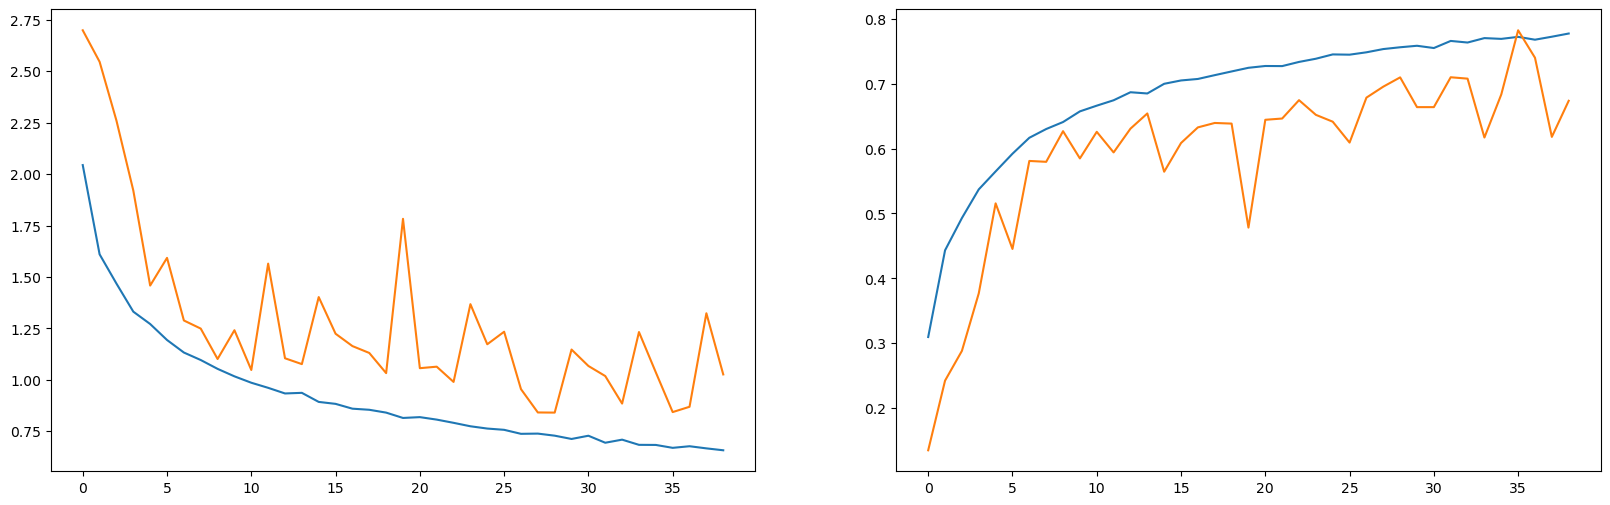

<Figure size 640x480 with 0 Axes>

In [15]:

# dibuja accuracy del progreso del entrenamiento
fig, axs = plt.subplots(1,2, figsize=(20,6))
plt.figure()
axs[0].plot(H.history["loss"], label="train_loss")
axs[0].plot(H.history["val_loss"], label="val_loss")

axs[1].plot(H.history["accuracy"], label="train_acc")
axs[1].plot(H.history["val_accuracy"], label="val_acc")

In [16]:
#print('Tiempo promedio por época %.2f segundos' % epoch_timing.avg_epoch_time)
model.evaluate(train_iter)
model.evaluate(valid_iter)

99/99 ━━━━━━━━━━━━━━━━━━━━ 32s 326ms/step - accuracy: 0.7317 - loss: 0.7886
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 327ms/step - accuracy: 0.7149 - loss: 0.8691


[0.8765947222709656, 0.7141038179397583]

- SIN BATCH NORMALIZATION: 0.7149
- CON BATCH NORMALIZATION: